In [4]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_style('darkgrid')

In [8]:
#Import packages for yfinance
import yfinance as yf
import datetime as dt

In [14]:
#Two years of data
start_date = dt.datetime.today() - dt.timedelta(days = 365)
end_date = dt.datetime.today()

#TSLA stock data, isolate the logreturn data as a numpy array.
TSLA_stock = yf.download('TSLA', start = start_date, end = end_date)
TSLA_returns = TSLA_stock['Close']/TSLA_stock['Close'].shift(1)
TSLA_logreturns = np.log(TSLA_returns.dropna())['TSLA'].values

#JNJ stock data, isolate the logreturn data as a numpy array.
JNJ_stock = yf.download('JNJ', start = start_date, end = end_date)
JNJ_returns = JNJ_stock['Close']/JNJ_stock['Close'].shift(1)
JNJ_logreturns = np.log(JNJ_returns.dropna())['JNJ'].values

/var/folders/xm/6mxd0lhj0jnf63lx6zv6zx_m0000gn/T/ipykernel_3352/2721322559.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  TSLA_stock = yf.download('TSLA', start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/xm/6mxd0lhj0jnf63lx6zv6zx_m0000gn/T/ipykernel_3352/2721322559.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  JNJ_stock = yf.download('JNJ', start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


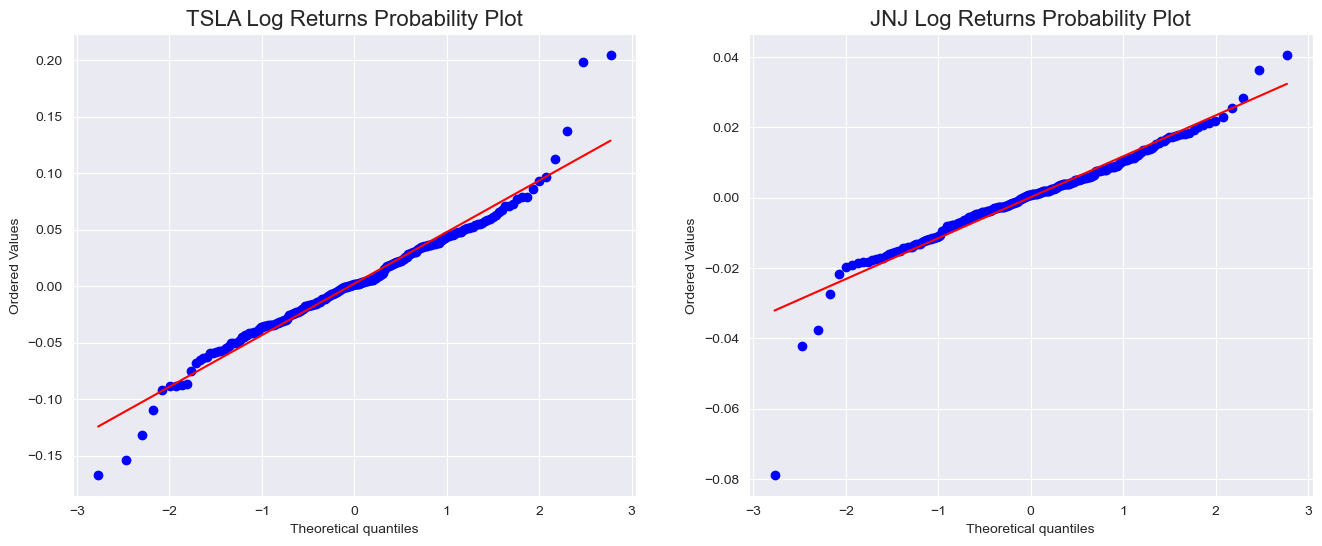

In [16]:
# Create 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot TSLA log returns
stats.probplot(TSLA_logreturns, dist="norm", plot=axes[0])
axes[0].set_title("TSLA Log Returns Probability Plot", fontsize=16)
axes[0].grid(True)

# Plot JNJ log returns
stats.probplot(JNJ_logreturns, dist="norm", plot=axes[1])
axes[1].set_title("JNJ Log Returns Probability Plot", fontsize=16)
axes[1].grid(True)

plt.show()

In [26]:
#Collect p-values of normality tests
p_tsla=stats.normaltest(TSLA_logreturns)[1]
p_jnj = stats.normaltest(JNJ_logreturns)[1]

#Print evidence/non-evidence of normality
print(f"TSLA log return distribution: p-value = {p_tsla:.4f}")
if p_tsla < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
    
print('--'*40) 
print('--'*40) 


print(f"JNJ log return distribution: p-value = {p_jnj:.4f}")
if p_jnj < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

TSLA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
JNJ log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


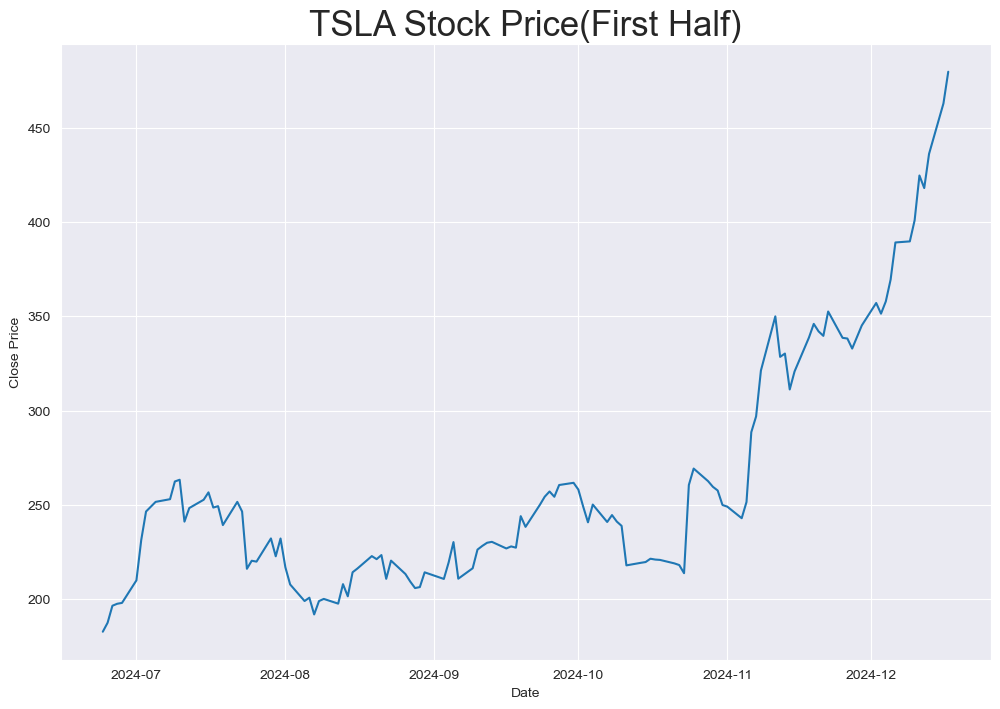

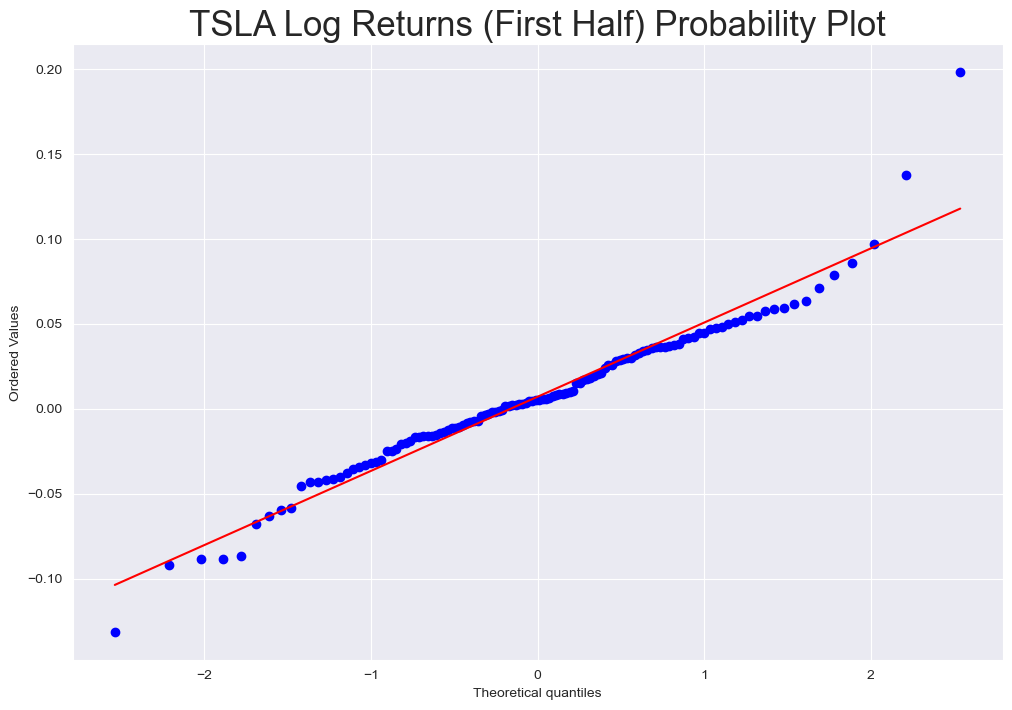

TSLA log return (First Half) distribution: p-value = 0.0003
→ Statistically significant evidence that the data is NOT normally distributed.


In [30]:
half_index = int(np.floor(len(TSLA_logreturns)/2))

TSLA_logreturns_historical = TSLA_logreturns[0:half_index]


TSLA_historical = TSLA_stock['Close'].iloc[:half_index]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(TSLA_historical)
plt.title('TSLA Stock Price(First Half)', fontsize=25)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,8))
stats.probplot(TSLA_logreturns_historical, plot = plt)
plt.title('TSLA Log Returns (First Half) Probability Plot', size = '25')
plt.show()

p_tsla_historical = stats.normaltest(TSLA_logreturns_historical)[1]

print(f"TSLA log return (First Half) distribution: p-value = {p_tsla_historical:.4f}")
if p_tsla_historical < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

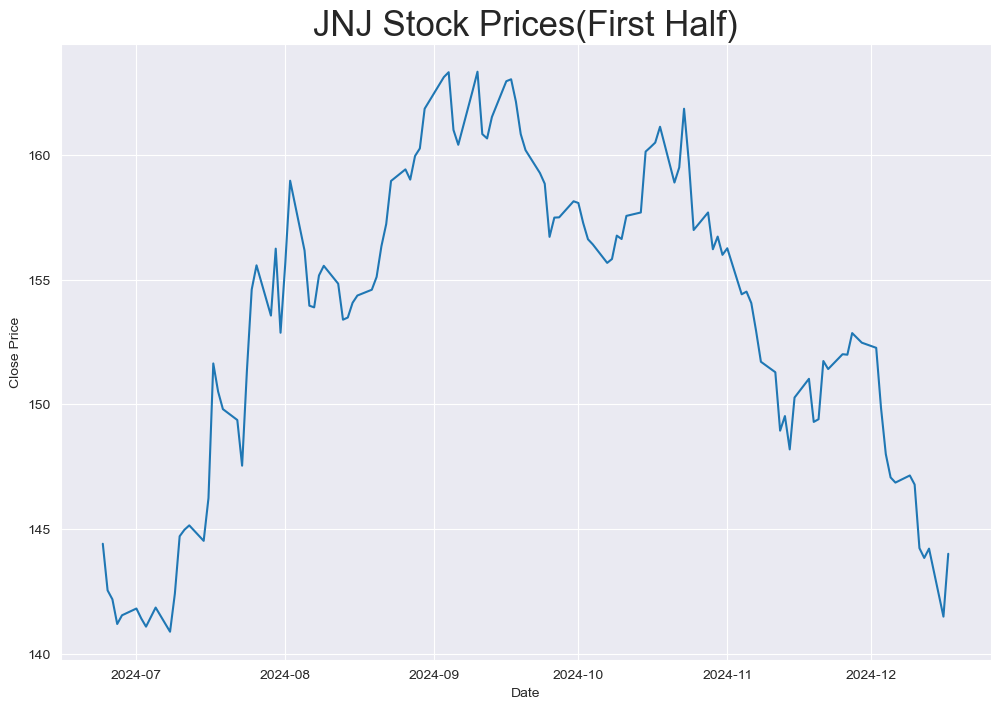

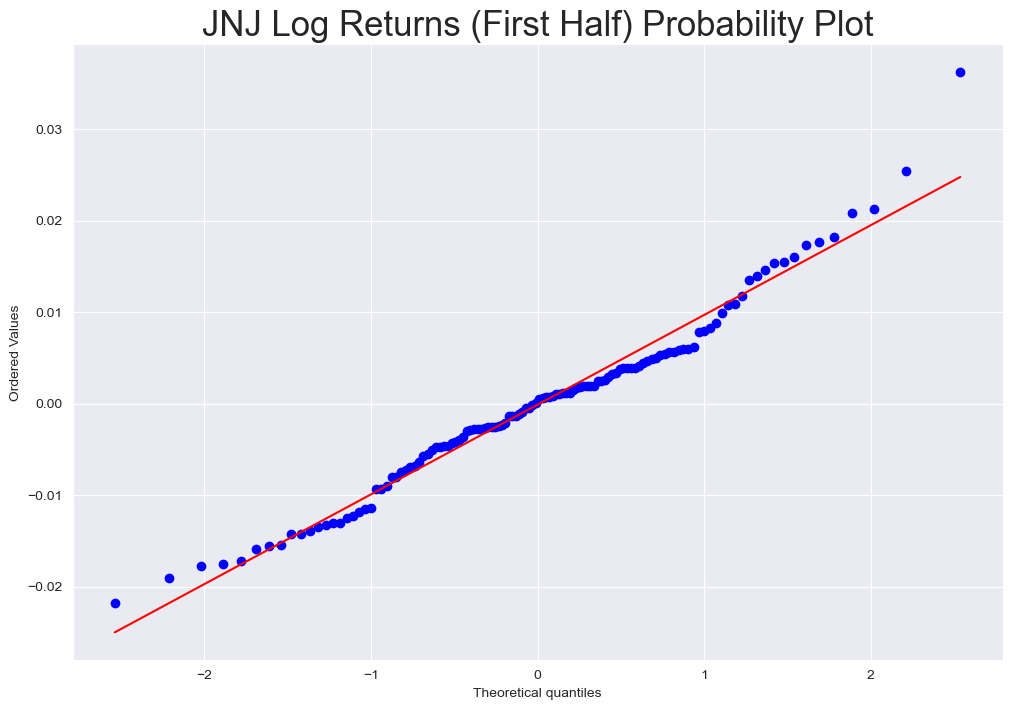

JNJ log return (First Half) distribution: p-value = 0.0136
→ Statistically significant evidence that the data is NOT normally distributed.


In [32]:
half_index = int(np.floor(len(JNJ_logreturns)/2))

JNJ_logreturns_historical = JNJ_logreturns[0:half_index]


JNJ_historical = JNJ_stock['Close'].iloc[:half_index]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(JNJ_historical)
plt.title('JNJ Stock Prices(First Half)', fontsize=25)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,8))
stats.probplot(JNJ_logreturns_historical, plot = plt)
plt.title('JNJ Log Returns (First Half) Probability Plot', size = '25')
plt.show()



p_jnj_historical = stats.normaltest(JNJ_logreturns_historical)[1]

print(f"JNJ log return (First Half) distribution: p-value = {p_jnj_historical:.4f}")
if p_jnj_historical < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")